# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
html_soup = soup(html, 'html.parser')

In [5]:
# Extract all rows of data
table = html_soup.find('table', class_='table')

all_rows = table.find_all('tr', class_="data-row")


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
mars_temps = []

# Loop through the scraped data to create a list of rows
for row in all_rows:
    tds = row.find_all("td")
    row_id = tds[0].text
    row_td = tds[1].text
    row_sol = tds[2].text
    row_ls = tds[3].text
    row_mon = tds[4].text
    row_min = tds[5].text
    row_pres = tds[6].text
    
    summary_dict = {'id':row_id,'terrestrial_data':row_td,\
                    'sol':row_sol, 'ls':row_ls, 'month':row_mon,\
                    'min_temp':row_min, 'pressure':row_pres} 
    
    mars_temps.append(summary_dict)



In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names

mars_df = pd.DataFrame(mars_temps)
mars_df = mars_df.set_index('id')


In [8]:
# Confirm DataFrame was created successfully
mars_df.head()

,terrestrial_data,sol,ls,month,min_temp,pressure
id,,,,,,
2,2012-08-16,10,155,6,-75.0,739.0
13,2012-08-17,11,156,6,-76.0,740.0
24,2012-08-18,12,156,6,-76.0,741.0
35,2012-08-19,13,157,6,-74.0,732.0
46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column

mars_df.dtypes

terrestrial_data    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
# Change data types for data analysis
mars_df['terrestrial_data']= pd.to_datetime(mars_df['terrestrial_data'])
mars_df['sol']= mars_df['sol'].astype(int)
mars_df['ls']= mars_df['ls'].astype(int)
mars_df['month']= mars_df['month'].astype(int)
mars_df['min_temp']= mars_df['min_temp'].astype(float)
mars_df['pressure']= mars_df['pressure'].astype(float)

In [11]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes


terrestrial_data    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
len(pd.unique(mars_df['month']))

12

In [13]:
# 2. How many Martian days' worth of data are there?
mars_df['sol'].count()

1867

In [14]:
# 3. What is the average low temperature by month?

avgtemp_df = mars_df.groupby('month')['min_temp'].mean()
avgtemp_df

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

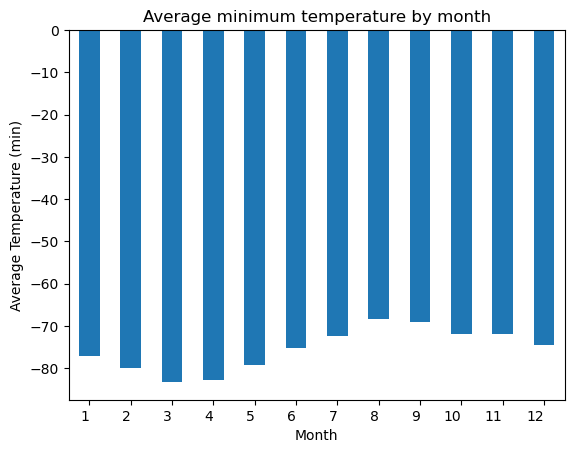

In [15]:
# Plot the average temperature by month
avgtemp_df.plot.bar()

plt.xticks(rotation=0, ha='right')
plt.title("Average minimum temperature by month")
plt.xlabel("Month")
plt.ylabel("Average Temperature (min)")



plt.show()

In [16]:
# Identify the coldest and hottest months in Curiosity's location
min_temp = avgtemp_df.loc[avgtemp_df==avgtemp_df.min()]

max_temp = avgtemp_df.loc[avgtemp_df==avgtemp_df.max()]


print(f"The coldest month is month {min_temp.idxmin()}, while the warmest month is month {max_temp.idxmax()}.")



The coldest month is month 3, while the warmest month is month 8.


In [17]:
# 4. Average pressure by Martian month
avgpres_df = mars_df.groupby('month')['pressure'].mean()
avgpres_df

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

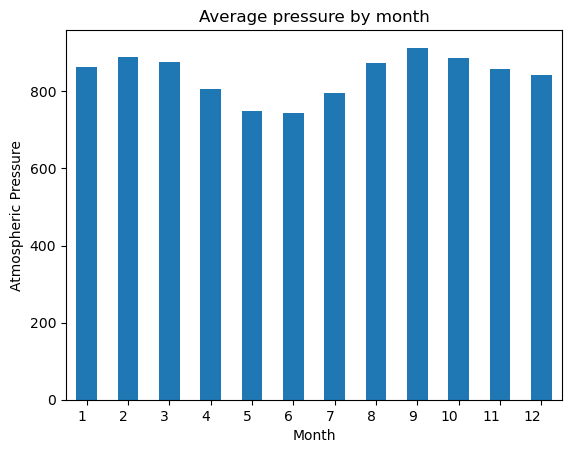

In [18]:
# Plot the average pressure by month
avgpres_df.plot.bar()

plt.xticks(rotation=0, ha='right')
plt.title("Average pressure by month")
plt.xlabel("Month")
plt.ylabel("Atmospheric Pressure")

plt.show()

In [19]:
# 5. How many terrestrial (earth) days are there in a Martian year?

# There are a couple ways of doing this. One would be to look at the dates as the planet makes its way around
# the sun. Get the first earth date on ls=0, then get last earth date on ls=360


start_date = (mars_df.loc[mars_df['ls']==0])[['ls','terrestrial_data','min_temp']]
end_date = (mars_df.loc[mars_df['ls']==359])[['ls','terrestrial_data','min_temp']]

print("End of martian year")
print(end_date)
print("")
print("Start of martian year")
print(start_date)


End of martian year
       ls terrestrial_data  min_temp
id                                  
316   359       2013-07-30     -75.0
318   359       2013-07-31     -76.0
955   359       2015-06-17     -78.0
956   359       2015-06-18     -79.0
1607  359       2017-05-04     -75.0
1608  359       2017-05-05     -75.0

Start of martian year
      ls terrestrial_data  min_temp
id                                 
320    0       2013-08-01     -75.0
319    0       2013-08-02     -77.0
954    0       2015-06-19     -81.0
938    0       2015-06-20     -63.0
1606   0       2017-05-06     -76.0
1610   0       2017-05-07     -75.0


In [57]:
#Choose dates based on full cycle from data above. The data contained 2 full cylces and 2 partial cycles

cycle1 = ((end_date.loc[:,'terrestrial_data'][2]) - (start_date.loc[:,'terrestrial_data'][0]))
cycle2 = ((end_date.loc[:,'terrestrial_data'][4]) - (start_date.loc[:,'terrestrial_data'][2]))

print(f"The first full martian year was {cycle1} earth days")
print(f"The second full martian year was {cycle2} earth days")



The first full martian year was 685 days 00:00:00 earth days
The second full martian year was 685 days 00:00:00 earth days


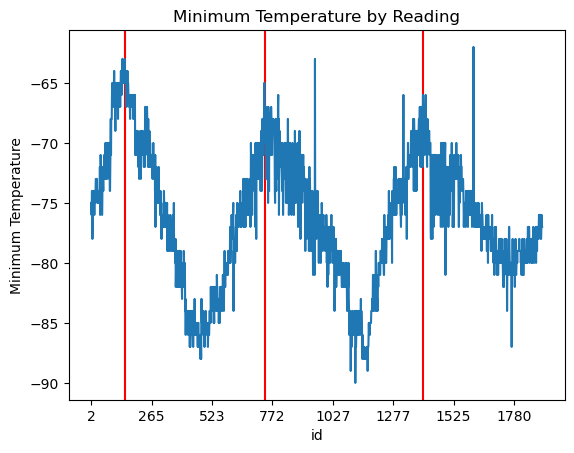

The first full martian year was approximately 674 days 00:00:00 earth days
The second full martian year was approximately 694 days 00:00:00 earth days


In [55]:
# Plotting temperature data, we can use the peaks in temperature to estimate the time. Not quite as accurate,
# but still within range.

plt.title("Minimum Temperature by Reading")
plt.ylabel("Minimum Temperature")
plt.axvline(x=140, color='red')
plt.axvline(x=720, color='red')
plt.axvline(x=1375, color='red')
mars_df['min_temp'].plot.line()

plt.show()

cycle1 = mars_df.loc[:,'terrestrial_data'][725] - mars_df.loc[:,'terrestrial_data'][135]
cycle2 = mars_df.loc[:,'terrestrial_data'][1375] - mars_df.loc[:,'terrestrial_data'][725]

print(f"The first full martian year was approximately {cycle1} earth days")
print(f"The second full martian year was approximately {cycle2} earth days")

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [58]:
# Write the data to a CSV
mars_df.to_csv("mars_data.csv", index=False)

In [59]:
browser.quit()